<a href="https://colab.research.google.com/github/dheerajpoonia29/machineLearningAlgorithm-courseWork/blob/master/piet-i3-day/Day5-Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

eruptions (float): Eruption time in minutes.

waiting (int): Waiting time to next eruption.


[Data](https://docs.google.com/spreadsheets/d/12xvZ-5FJJ08o5Il0zjzFmF4JPdZshbHcdGz1kkIBlFc/edit?usp=sharing)



In [ ]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Load The Data

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Import the data
df = pd.read_csv('Kmeans_Data.csv')



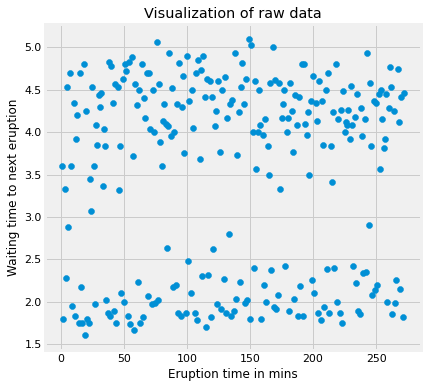

In [ ]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

We’ll use this data because it’s easy to plot and visually spot the clusters since its a 2-dimension dataset. It’s obvious that we have 2 clusters. Let’s standardize the data first and run the kmeans algorithm on the standardized data with K=2.

In [ ]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
from sklearn import metrics
from sklearn.cluster import KMeans


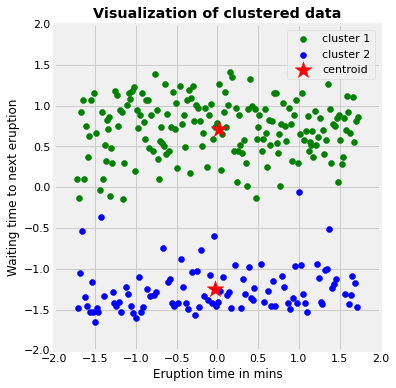

In [ ]:
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

The above graph shows the scatter plot of the data colored by the cluster they belong to. In this example, we chose K=2. The symbol ‘*‘ is the centroid of each cluster. We can think of those 2 clusters as geyser had different kinds of behaviors under different scenarios.
Next, we’ll show that different initializations of centroids may yield to different results. I’ll use 9 different random_state to change the initialization of the centroids and plot the results. The title of each plot will be the sum of squared distance of each initialization.
As a side note, this dataset is considered very easy and converges in less than 10 iterations. Therefore, to see the effect of random initialization on convergence, I am going to go with 3 iterations to illustrate the concept. However, in real world applications, datasets are not at all that clean and nice!

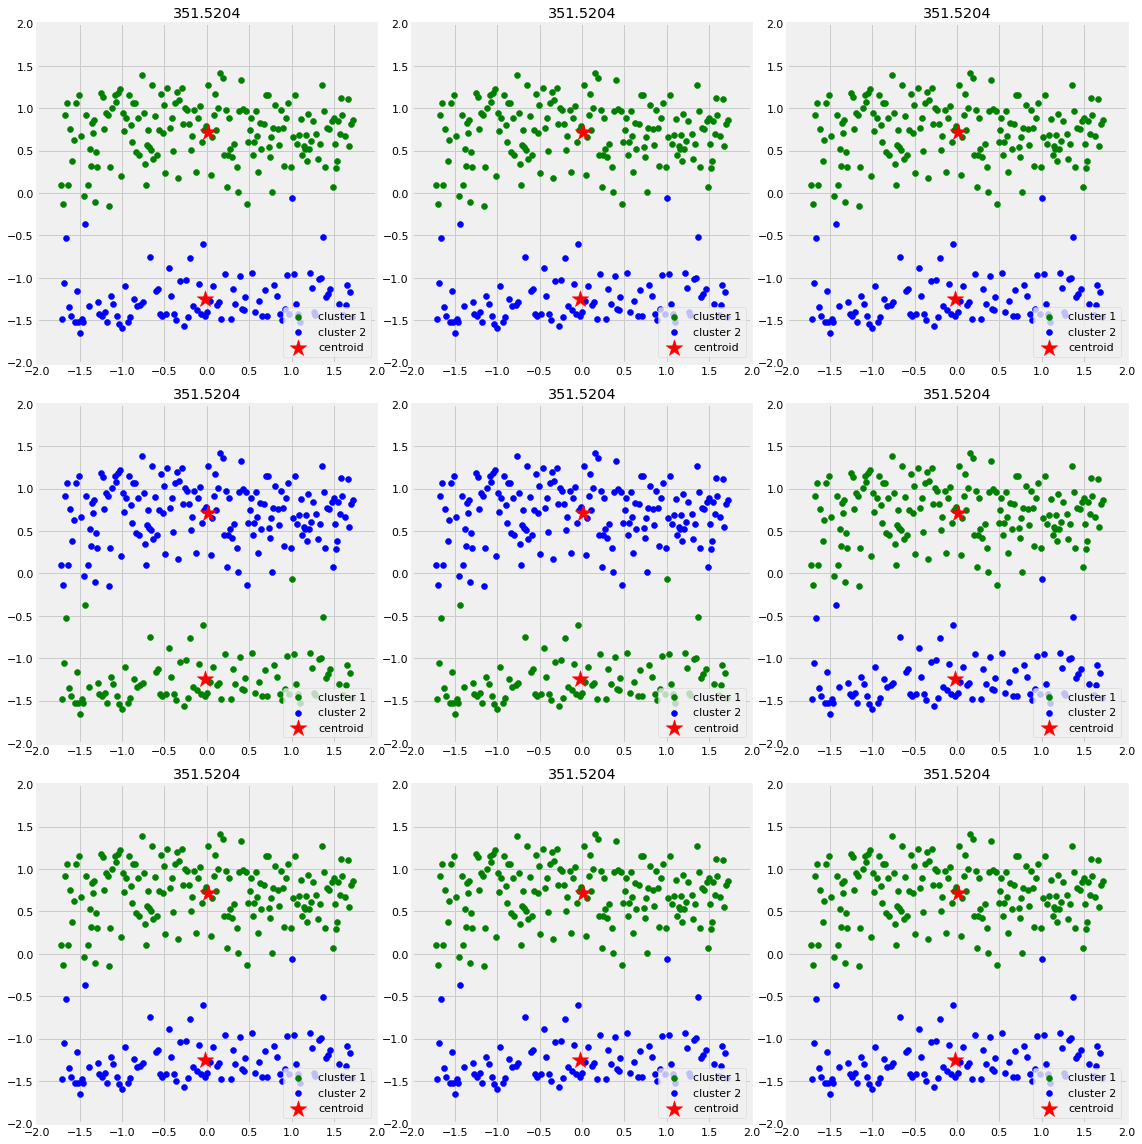

In [ ]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
import numpy as np
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3,
                random_state=int(np.random.randint(0, 1000, size=1)))
    km.fit(X_std)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.inertia_:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();